## Week 4: Regularized Regression and Combining Predictors

### Regularized Regression

**Basic idea**
1. Fit a regression model
1. Penalize (or shrink) large coefficients

**Pros**
- Can help with the bias/variance tradeoff
- Can help with model selection

**Cons**
- May be computationally demanding on large data sets
- Does not perform as well as random forests and boosting

**A motivating example**

    $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$
    
    where $X_1$ and $X_2$ are nearly perfectly correlated (co-linear). You can approximate this model by 
    
    $Y = \beta_0 + \left( \beta_1 + \beta_2 \right) X_1 + \epsilon$
    
The result is
- You will get a good estimate of $Y$
- The estimate (of $Y$) will be biased
- We may reduce variance in the estimate

In [1]:
load("data/ElemStatLearn/data/prostate.RData")
str(prostate)

'data.frame':	97 obs. of  10 variables:
 $ lcavol : num  -0.58 -0.994 -0.511 -1.204 0.751 ...
 $ lweight: num  2.77 3.32 2.69 3.28 3.43 ...
 $ age    : int  50 58 74 58 62 50 64 58 47 63 ...
 $ lbph   : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ svi    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lcp    : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ gleason: int  6 6 7 6 6 6 6 6 6 6 ...
 $ pgg45  : int  0 0 20 0 0 0 0 0 0 0 ...
 $ lpsa   : num  -0.431 -0.163 -0.163 -0.163 0.372 ...
 $ train  : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...


#### Model selection approach: split samples

In [2]:
small <- prostate[1:5, ]
lm(lpsa ~., data = small)


Call:
lm(formula = lpsa ~ ., data = small)

Coefficients:
(Intercept)       lcavol      lweight          age         lbph          svi  
    9.60615      0.13901     -0.79142      0.09516           NA           NA  
        lcp      gleason        pgg45    trainTRUE  
         NA     -2.08710           NA           NA  


####

In [9]:
library(ISLR)
data(Wage)
library(ggplot2)
library(caret)

Wage <- subset(Wage, select = -c(logwage))

# Create a building data set and validation set
inBuild <- createDataPartition(y = Wage$wage, p = 0.7, list = FALSE)

validation <- Wage[-inBuild, ]
buildData <- Wage[inBuild,]

inTrain <- createDataPartition(y = buildData$wage, p = 0.7, list = FALSE)

training <- buildData[inTrain,]
testing <- buildData[-inTrain,]

In [10]:
mod1 <- train(wage ~., method="glm", data = training)
mod2 <- train(wage ~., method = 'rf', data = training, trControl = trainControl(method='cv'), number = 3)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misl

### Forecasting

Specifically used for time series analysis

### Unsupervised Prediction

## Quiz 4
### Question 1

In [16]:
library(caret)

In [12]:
#library(ElemStatLearn)
load('data/ElemStatLearn/data/vowel.train.RData')
load('data/ElemStatLearn/data/vowel.test.RData')

In [14]:
vowel.train$y = factor(vowel.train$y)
vowel.test$y = factor(vowel.test$y)

In [15]:
str(vowel.train)

'data.frame':	528 obs. of  11 variables:
 $ y   : Factor w/ 11 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ x.1 : num  -3.64 -3.33 -2.12 -2.29 -2.6 ...
 $ x.2 : num  0.418 0.496 0.894 1.809 1.938 ...
 $ x.3 : num  -0.67 -0.694 -1.576 -1.498 -0.846 ...
 $ x.4 : num  1.779 1.365 0.147 1.012 1.062 ...
 $ x.5 : num  -0.168 -0.265 -0.707 -1.053 -1.633 ...
 $ x.6 : num  1.627 1.933 1.559 1.06 0.764 ...
 $ x.7 : num  -0.388 -0.363 -0.579 -0.567 0.394 0.217 0.322 -0.435 -0.512 -0.466 ...
 $ x.8 : num  0.529 0.51 0.676 0.235 -0.15 -0.246 0.45 0.992 0.928 0.702 ...
 $ x.9 : num  -0.874 -0.621 -0.809 -0.091 0.277 0.238 0.377 0.575 -0.167 0.06 ...
 $ x.10: num  -0.814 -0.488 -0.049 -0.795 -0.396 -0.365 -0.366 -0.301 -0.434 -0.836 ...


In [17]:
set.seed(33833)
modFit1 <- train(y ~ ., data = vowel.train, method = 'rf')
modFit2 <- train(y ~ ., data = vowel.train, method = 'gbm')

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        2.3979            -nan     0.1000    0.4116
     2        2.1486            -nan     0.1000    0.2271
     3        2.0062            -nan     0.1000    0.1445
     4        1.9036            -nan     0.1000    0.1628
     5        1.8023            -nan     0.1000    0.1246
     6        1.7223            -nan     0.1000    0.1072
     7        1.6511            -nan     0.1000    0.1094
     8        1.5813            -nan     0.1000    0.0690
     9        1.5204            -nan     0.1000    0.0855
    10        1.4530            -nan     0.1000    0.0592
    20        1.0913            -nan     0.1000    0.0314
    40        0.7064            -nan     0.1000    0.0060
    60        0.5015            -nan     0.1000   -0.0002
    80        0.3653            -nan     0.1000   -0.0009
   100        0.2761            -nan     0.1000   -0.0009
   120        0.2064            -nan     0.1000    0.0018
   140        

In [20]:
pred1Test <- predict(modFit1, vowel.test)
pred2Test <- predict(modFit2, vowel.test)

In [22]:
confusionMatrix(pred1Test, vowel.test$y)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9 10 11
        1  33  1  0  0  0  0  0  0  0  1  0
        2   9 23  3  0  0  0  0  0  0 17  1
        3   0 15 32  3  0  0  0  0  0  3  1
        4   0  0  4 31  3  0  0  0  0  0  2
        5   0  0  0  0 16  8  9  0  0  0  0
        6   0  0  3  8 20 26  5  0  0  0  6
        7   0  0  0  0  3  0 27  6  5  0  3
        8   0  0  0  0  0  0  0 29  5  0  0
        9   0  3  0  0  0  0  0  7 24  2 12
        10  0  0  0  0  0  0  1  0  2 19  0
        11  0  0  0  0  0  8  0  0  6  0 17

Overall Statistics
                                          
               Accuracy : 0.5996          
                 95% CI : (0.5533, 0.6446)
    No Information Rate : 0.0909          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5595          
                                          
 Mcnemar's Test P-Value : NA              

Statistics 

In [23]:
confusionMatrix(pred2Test, vowel.test$y)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9 10 11
        1  28  0  0  0  0  0  0  0  0  2  0
        2  10 22  1  0  0  0  1  0  0 14  0
        3   2 10 11  3  0  0  0  0  0  0  0
        4   0  0  7 23  3  0  1  0  0  0  0
        5   0  0  0  1 17  5  0  0  0  0  0
        6   0  1 18 14 10 28  0  0  2  0 10
        7   0  0  0  0  8  2 38  9  4  0 10
        8   0  0  0  0  0  0  2 28  9  0  0
        9   0  5  0  0  0  0  0  5 27  4 18
        10  2  0  0  0  0  0  0  0  0 22  0
        11  0  4  5  1  4  7  0  0  0  0  4

Overall Statistics
                                         
               Accuracy : 0.5368         
                 95% CI : (0.4901, 0.583)
    No Information Rate : 0.0909         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4905         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

In [24]:
confusionMatrix(pred1Test, pred2Test)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9 10 11
        1  28  2  1  0  0  0  0  0  0  3  1
        2   1 41  4  0  0  0  0  0  3  2  2
        3   1  3 21  5  0 15  1  0  0  2  6
        4   0  0  0 28  0  8  0  0  2  0  2
        5   0  0  0  0 16  2 12  2  0  0  1
        6   0  0  0  1  6 49  9  0  0  0  3
        7   0  1  0  0  1  0 40  1  1  0  0
        8   0  0  0  0  0  0  3 31  0  0  0
        9   0  0  0  0  0  0  1  5 41  1  0
        10  0  1  0  0  0  0  1  0  4 16  0
        11  0  0  0  0  0  9  4  0  8  0 10

Overall Statistics
                                          
               Accuracy : 0.6948          
                 95% CI : (0.6506, 0.7365)
    No Information Rate : 0.1797          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6609          
                                          
 Mcnemar's Test P-Value : NA              

Statistics 

### Question 2

In [1]:
library(caret)

library(gbm)

set.seed(3433)

library(AppliedPredictiveModeling)

data(AlzheimerDisease)

adData = data.frame(diagnosis,predictors)

inTrain = createDataPartition(adData$diagnosis, p = 3/4)[[1]]

training = adData[ inTrain,]

testing = adData[-inTrain,]

Loading required package: lattice

Loading required package: ggplot2

Loaded gbm 2.1.8



In [18]:
set.seed(62433)

modRF <- train(diagnosis ~., data = training, method = 'rf')
modGBM <- train(diagnosis ~., data = training, method = 'gbm')
modLDA <- train(diagnosis ~., data = training, method = 'lda')

predRFtesting <- predict(modRF, testing)
predGBMtesting <- predict(modGBM, testing)
predLDAtesting <- predict(modLDA, testing)

predDF <- data.frame(predRFtesting, predGBMtesting, predLDAtesting, testing$diagnosis)
modComb <- train(testing.diagnosis ~., method = "rf", data = predDF)

predComb <- predict(modComb, predDF)

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



In [19]:
confusionMatrix(predRFtesting, testing$diagnosis)$overall[1]

Accuracy 
0.902439

In [20]:
confusionMatrix(predGBMtesting, testing$diagnosis)$overall[1]

Accuracy 
0.8902439

In [21]:
confusionMatrix(predLDAtesting, testing$diagnosis)$overall[1]

Accuracy 
0.9146341

In [22]:
confusionMatrix(predComb, testing$diagnosis)$overall[1]

Accuracy 
0.9268293

### Question 3

In [23]:
set.seed(3523)

library(AppliedPredictiveModeling)

data(concrete)

inTrain = createDataPartition(concrete$CompressiveStrength, p = 3/4)[[1]]

training = concrete[ inTrain,]

testing = concrete[-inTrain,]

In [24]:
dim(training); dim(testing)

[1] 774   9

[1] 256   9

In [25]:
head(training)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
3,332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
5,198.6,132.4,0,192,0.0,978.4,825.5,360,44.30
6,266.0,114.0,0,228,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0,228,0.0,932.0,594.0,365,43.70
8,380.0,95.0,0,228,0.0,932.0,594.0,28,36.45


In [27]:
set.seed(233)
modLasso <- train(CompressiveStrength ~ ., data = training, method = "lasso")

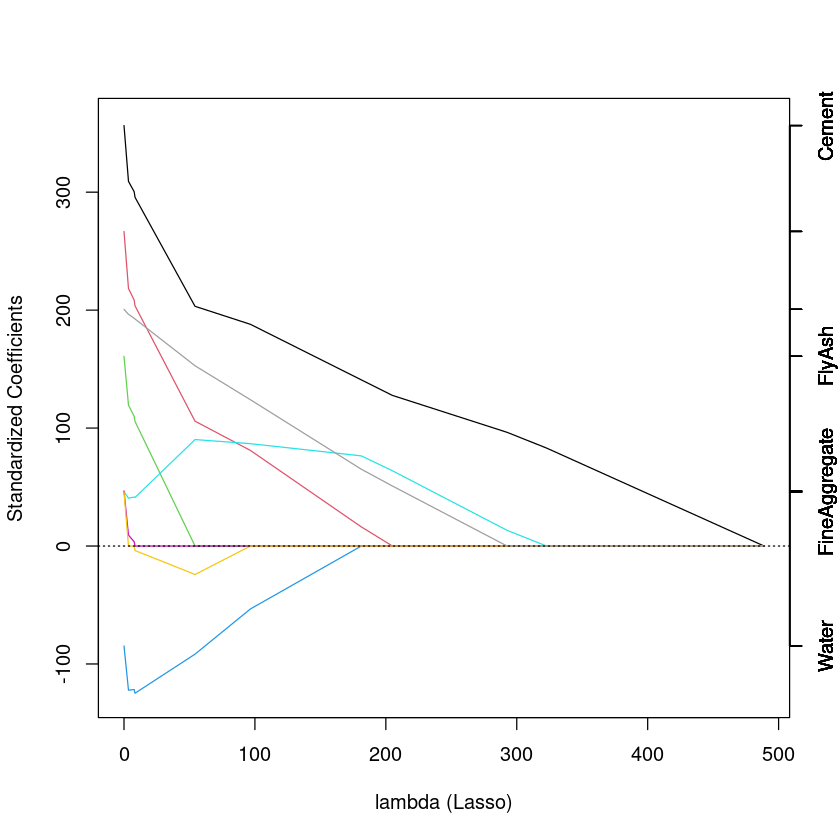

In [30]:
library(elasticnet)
plot.enet(modLasso$finalModel, xvar = "penalty", use.color = TRUE)

### Question 4


In [33]:
library(lubridate)
dat <- read.csv("data/gaData.csv")
training = dat[year(dat$date) < 2012,]

testing = dat[(year(dat$date)) > 2011,]

tstrain = ts(training$visitsTumblr)

In [36]:
library(forecast)
modTS <- bats(tstrain)
fcast <- forecast(modTS, level = 95, h = dim(testing)[1])
sum(fcast$lower < testing$visitsTumblr & testing$visitsTumblr < fcast$upper) / dim(testing)[1]

ERROR: Error in library(forecast): there is no package called ‘forecast’


### Question 5

In [42]:
set.seed(3523)

library(AppliedPredictiveModeling)

data(concrete)

inTrain = createDataPartition(concrete$CompressiveStrength, p = 3/4)[[1]]

training = concrete[ inTrain,]
testing = concrete[-inTrain,]

In [49]:
set.seed(325)
library(e1071)
library(forecast)
modSVM <- svm(CompressiveStrength ~ ., data = training)
predSVMTesting <- predict(modSVM, testing)
accuracy(predSVMTesting, testing$CompressiveStrength)

ERROR: Error in library(forecast): there is no package called ‘forecast’


In [46]:
?accuracy

No documentation for ‘accuracy’ in specified packages and libraries:
you could try ‘??accuracy’